In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = "EastWestAirlines.xlsx"
data = pd.read_excel(file_path, sheet_name="data")

In [ ]:
# Drop the ID column as it is not useful for clustering
data_cleaned = data.drop(columns=["ID#"])


In [ ]:
# Handle missing values (if any)
print("Checking for missing values:")
print(data_cleaned.isnull().sum())


Checking for missing values:
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [ ]:
# Detect and remove outliers using the Z-score method
from scipy.stats import zscore
z_scores = np.abs(zscore(data_cleaned))
data_no_outliers = data_cleaned[(z_scores < 3).all(axis=1)]

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

In [ ]:
# Convert scaled data back to DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

In [ ]:
# Perform exploratory data analysis (EDA)
print(scaled_df.describe())

            Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   2.842882e-17  6.574164e-17  1.705729e-16  3.038330e-16  1.350369e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03        3999.000000     3.999000e+03   
mean  -2.842882e-17 -7.817925e-17           0.000000     1.776801e-17   
std    1.000125e+00  1.000125e+00           1.000125     1.000125e+00

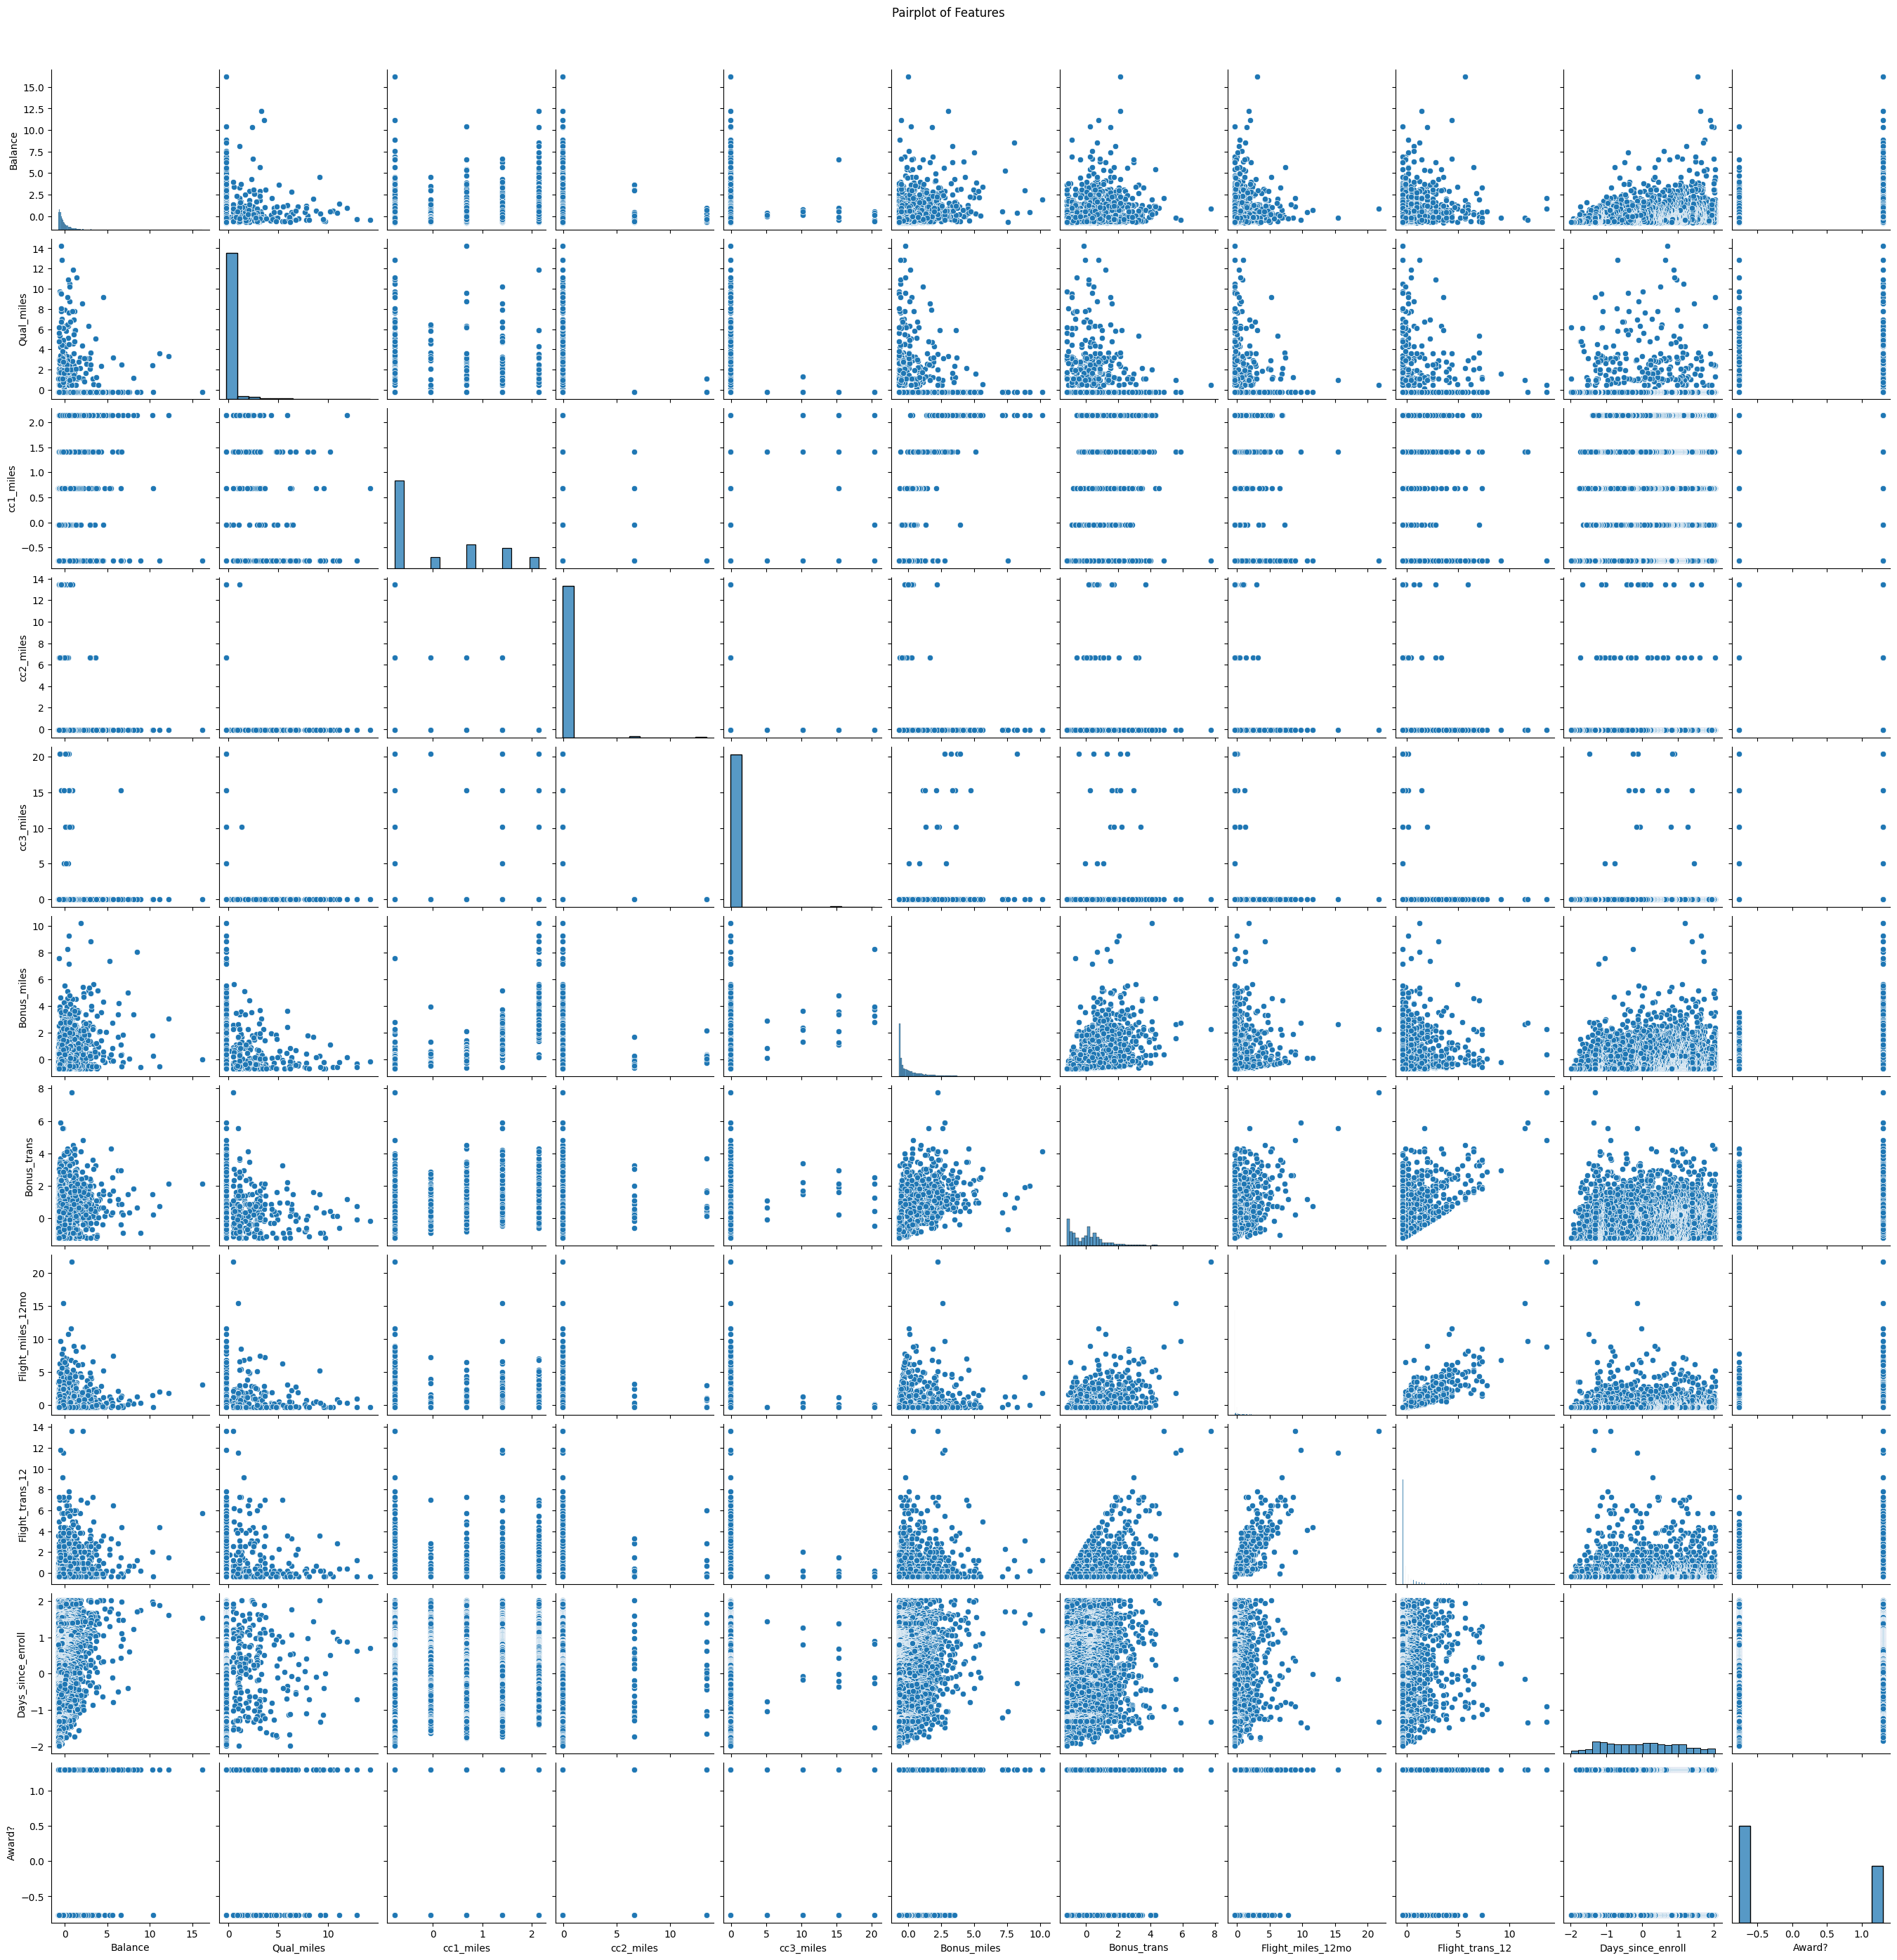

In [ ]:
# Pairplot to examine feature relationships
sns.pairplot(pd.DataFrame(scaled_data, columns=data_no_outliers.columns))
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


Visualizations

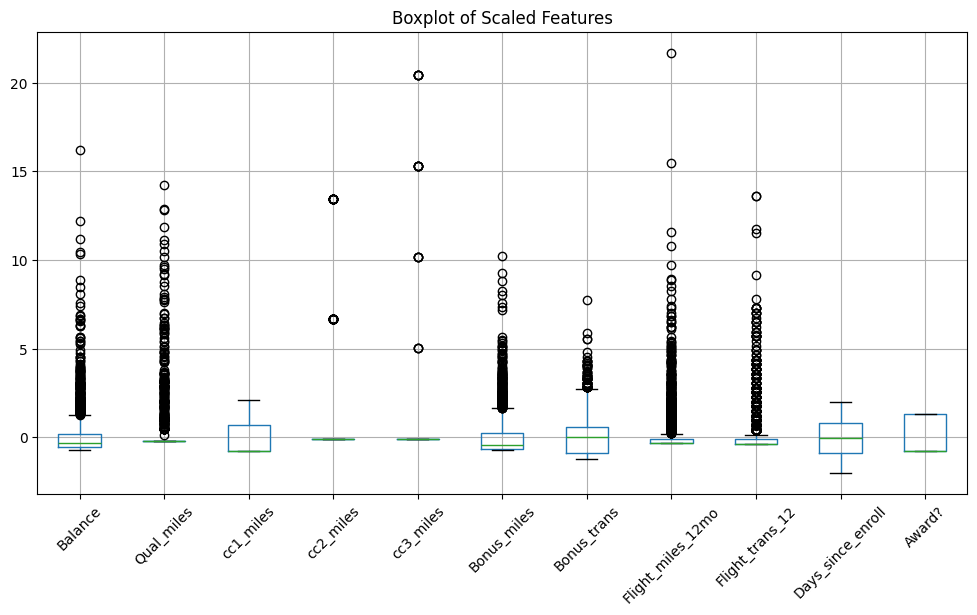

In [ ]:
# Boxplot for each feature to identify patterns and outliers
plt.figure(figsize=(12, 6))
scaled_df.boxplot()
plt.title("Boxplot of Scaled Features")
plt.xticks(rotation=45)
plt.show()


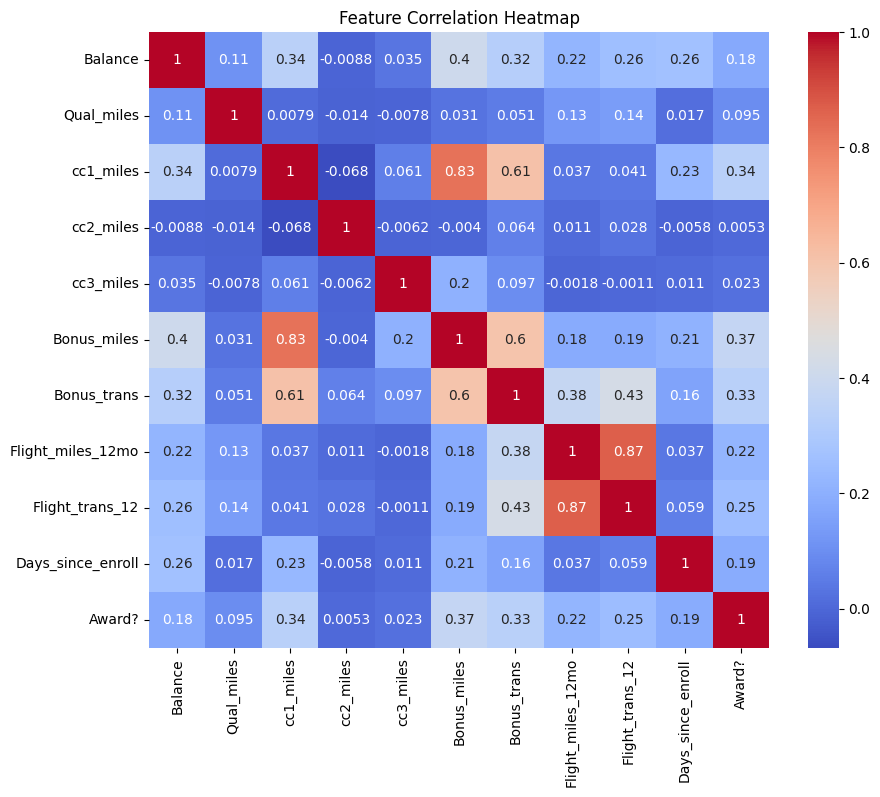

In [ ]:
# Heatmap to visualize feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(scaled_data, columns=data_no_outliers.columns).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# K-Means Clustering
print("\n### K-Means Clustering ###")
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


### K-Means Clustering ###


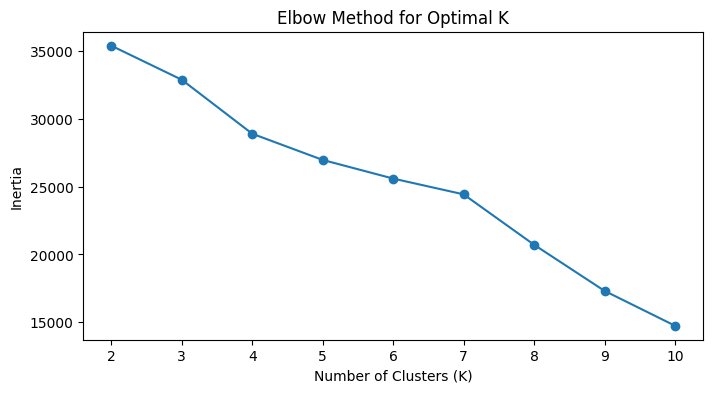

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Silhouette Score: Measures how well data points fit within their clusters.

In [ ]:
# Final K-Means with optimal K (assume optimal K=4 from Elbow Method)
kmeans = KMeanskmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

K-Means Silhouette Score: 0.19



### Hierarchical Clustering ###


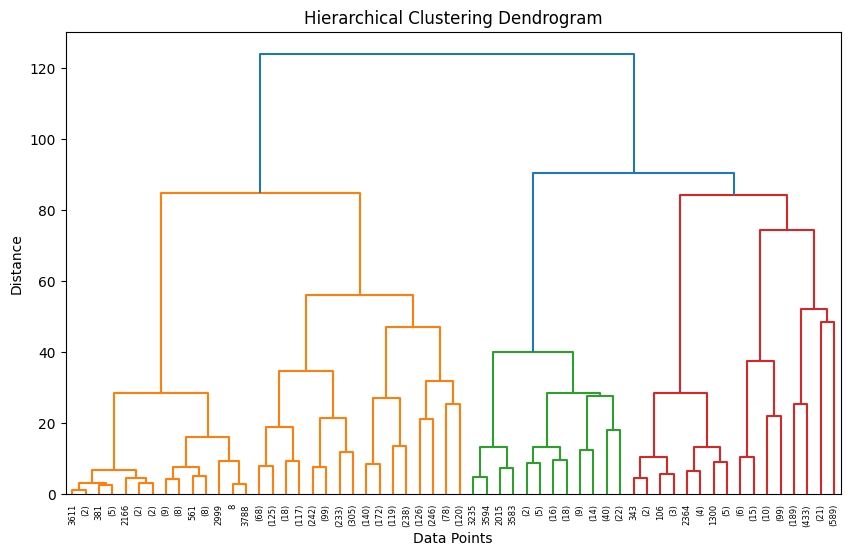

In [ ]:
# Hierarchical Clustering
print("\n### Hierarchical Clustering ###")
linked = linkage(scaled_data, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Assign clusters for a chosen number of clusters (e.g., 4)
linked = linkage(scaled_data, method="ward")
hier_labels = fcluster(linked, 4, criterion="maxclust")
hier_silhouette = silhouette_score(scaled_data, hier_labels)
print(f"Hierarchical Clustering Silhouette Score: {hier_silhouette:.2f}")

Hierarchical Clustering Silhouette Score: 0.31


In [ ]:
# DBSCAN Clustering
print("\n### DBSCAN Clustering ###")
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
# Check the number of clusters (excluding noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN Number of Clusters: {n_clusters_dbscan}")
if n_clusters_dbscan > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(scaled_data, dbscan_labels):.2f}")


### DBSCAN Clustering ###
DBSCAN Number of Clusters: 5
DBSCAN Silhouette Score: 0.25


In [ ]:
# Visualization: Scatter plots for clusters
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

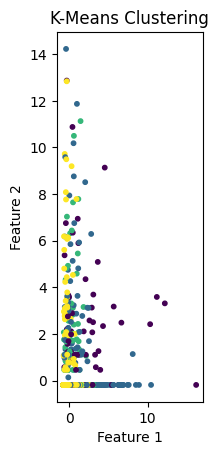

In [ ]:
# K-Means Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap="viridis", s=10)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

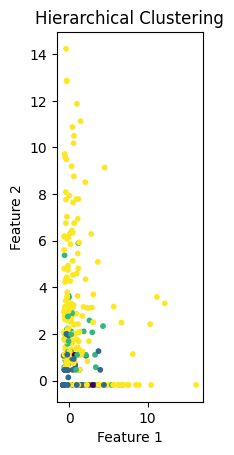

In [ ]:
# Hierarchical Scatter Plot
plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hier_labels, cmap="viridis", s=10)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

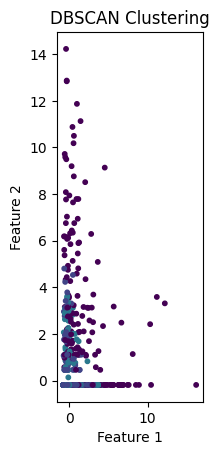

In [ ]:
# DBSCAN Scatter Plot
plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap="viridis", s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
print("\nCluster Analysis and Insights:")
kmeans_clusters = pd.DataFrame(scaled_data, columns=data_cleaned.columns)
kmeans_clusters["Cluster"] = kmeans_labels
print(kmeans_clusters.groupby("Cluster").mean())



Cluster Analysis and Insights:
          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster                                                                       
0        1.187834    0.841996   0.087142   0.162282  -0.062767     0.627277   
1        0.481511    0.009838   1.325990  -0.079852   0.159750     1.102684   
2       -0.138024   -0.040567  -0.499254   0.115488  -0.058622    -0.448640   
3       -0.364031   -0.061306  -0.573725  -0.053145  -0.062767    -0.507192   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster                                                                       
0           1.668953           3.621465         3.912240           0.275809   
1           0.811893          -0.066809        -0.075358           0.319068   
2          -0.327577          -0.143729        -0.149487           0.787578   
3          -0.501074          -0.208705        -0.227878          -0.911480   

           Award? 

In [ ]:
hier_clusters = pd.DataFrame(scaled_data, columns=data_cleaned.columns)
hier_clusters["Cluster"] = hier_labels
print(hier_clusters.groupby("Cluster").mean())

          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster                                                                       
1       -0.046890   -0.156236  -0.668227   9.038254  -0.062767    -0.101665   
2       -0.270655   -0.174627  -0.592297  -0.098242  -0.062767    -0.508397   
3        0.608155    0.322155   0.269661  -0.098242  -0.062767     0.804926   
4        0.423897    0.284041   1.045243  -0.098242   0.119120     0.828456   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster                                                                       
1           0.617851           0.087549         0.220347          -0.072464   
2          -0.488856          -0.175169        -0.184523          -0.169125   
3           1.847056           3.896667         4.024804           0.232967   
4           0.673230          -0.059324        -0.058954           0.280079   

           Award?  
Cluster            
1        0

In [ ]:
if n_clusters_dbscan > 1:
    dbscan_clusters = pd.DataFrame(scaled_data, columns=data_cleaned.columns)
    dbscan_clusters["Cluster"] = dbscan_labels
    print(dbscan_clusters[dbscan_clusters["Cluster"] != -1].groupby("Cluster").mean())

          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster                                                                       
0       -0.169463   -0.148484  -0.272491  -0.098242  -0.062767    -0.312887   
1       -0.014745   -0.106256   0.415824  -0.098242  -0.062767     0.315910   
2       -0.347792   -0.186299  -0.769578   6.675367  -0.062767    -0.339296   
3       -0.367963   -0.186299  -0.769578  13.448976  -0.062767    -0.067349   
4       -0.421183   -0.186299  -0.769578   6.675367  -0.062767    -0.348744   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster                                                                       
0          -0.299206          -0.205003        -0.227000          -0.151698   
1           0.219826          -0.047935        -0.039653           0.217198   
2           0.138653          -0.285747        -0.256702          -0.352641   
3           0.301803          -0.292890        -0.2